# 1.Introduction

**About Walmart**

Walmart is an American multinational retail corporation that operates a chain of supercenters, discount departmental stores, and grocery stores from the United States. Walmart has more than 100 million customers worldwide.

**Business Problem**

 The Management team at Walmart Inc. wants to analyze the customer purchase behavior (specifically, purchase amount) against the customer’s gender and the various other factors to help the business make better decisions. They want to understand if the spending habits differ between male and female customers: Do women spend more on Black Friday than men?

# 2.0 Exploratory Data Analysis

In [ ]:
df.sample(10)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
203754,1001447,P00116542,M,18-25,4,A,0,0,5,8610
309709,1005738,P00182342,M,26-35,12,A,1,1,1,4257
29345,1004458,P00010842,F,26-35,4,B,1,0,8,5884
3660,1000594,P00192942,F,55+,13,B,3,0,5,6904
95406,1002776,P00302742,M,26-35,14,C,4+,0,8,8133
278003,1000881,P00186242,M,18-25,14,A,1,0,4,1422
273223,1000081,P00114042,F,26-35,0,A,1,1,5,7073
178599,1003618,P00043542,M,55+,17,A,4+,1,8,5843
416932,1004124,P00226342,M,26-35,18,C,1,1,11,4507
534187,1004250,P00189142,F,51-55,0,C,4+,1,8,7802


***Observations -***
- We got 10 columns and from the look of things, the only column we can consider right as a Numerical varible type is *'Product Column'*.
 - All other columns are under the categorical variable category.

***Required Action -***
- Checking if the columsn have the correct datatype and if not, the respective columns needed to be changed to their appropriate datatype.

In [ ]:
df.shape

(550068, 10)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


***Observation -***
- The structure of the data frame consist of
 - 550068 columns and
 - 10 rows
- The data types for the columns are not properly assigned.

***Further Action -***
- Each column should be assigned the appropriate datatype to suit out analysis.

In [ ]:
df_unique_check = df.copy()
for i in df.columns:
  if i == 'Purchase':
    continue
  df[i] = df[i].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype   
---  ------                      --------------   -----   
 0   User_ID                     550068 non-null  category
 1   Product_ID                  550068 non-null  category
 2   Gender                      550068 non-null  category
 3   Age                         550068 non-null  category
 4   Occupation                  550068 non-null  category
 5   City_Category               550068 non-null  category
 6   Stay_In_Current_City_Years  550068 non-null  category
 7   Marital_Status              550068 non-null  category
 8   Product_Category            550068 non-null  category
 9   Purchase                    550068 non-null  int64   
dtypes: category(9), int64(1)
memory usage: 10.3 MB


***Observations -***
- All the columns except for the Purchase column is changed to "Categorical Varibale".

***Further Action -***
-

*Handling duplicates and analysis of Unique values -*

In [ ]:
df.nunique()

User_ID                        5891
Product_ID                     3631
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category                 20
Purchase                      18105
dtype: int64

***Observations -***
- From the above line what we can understand that despite having 550068 rows we have just 5891 User_ID records.
- This implies that this is a sales data where a single user will have multiple records which is based on their buying frequency.
- Generally, with these kinds of data there are high chances of duplicate records since we don't have the sales_id to differentiate each sales.

***Further Action -***
- Find and remove the duplicates.
- Make a summary with unique values to understand our dataset.

*Finding the Unique value in each column*

In [ ]:
def unique_values():
  for i in df_unique_check.columns:
    if df_unique_check[i].dtype == 'int64':
      print(f"Unique values in {i} column are")
      print(np.sort(df_unique_check[i].unique()), end='\n\n')
    else:
      print(f"Unique values in {i} column are")
      print(df_unique_check[i].unique(), end='\n\n')
unique_values()

Unique values in User_ID column are
[1000001 1000002 1000003 ... 1006038 1006039 1006040]

Unique values in Product_ID column are
['P00069042' 'P00248942' 'P00087842' ... 'P00370293' 'P00371644'
 'P00370853']

Unique values in Gender column are
['F' 'M']

Unique values in Age column are
['0-17' '55+' '26-35' '46-50' '51-55' '36-45' '18-25']

Unique values in Occupation column are
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]

Unique values in City_Category column are
['A' 'C' 'B']

Unique values in Stay_In_Current_City_Years column are
['2' '4+' '3' '1' '0']

Unique values in Marital_Status column are
[0 1]

Unique values in Product_Category column are
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]

Unique values in Purchase column are
[   12    13    14 ... 23959 23960 23961]



***Observations -***
- The unique values are consolidated and sorted based on their datatype for the ease of
analysis.

In [ ]:
df['Marital_Status'] = df['Marital_Status'].replace({0:'Single', 1:'Married'})

*Finding if the columns are properly structured and making sure that there are no nested values*

In [ ]:
df[df.duplicated()].value_counts()

Series([], Name: count, dtype: int64)

***Observations -***
- There are no duplicate records and the dataset is complete.

***Further Action -***
- Checking the structure of the dataset.

*Checking for Nested Values*

In [ ]:
def nested_values_check():
  df_check = df.copy() # Creating a copy to have the main dataframe unaffected.
  for i in df_check.columns:
    df_check[i] = df_check[i].astype('str')
    if i == 'Purchase':
      if df_check[i].str.contains(',').any()==False:
        print(f"{i} column--> Structured Properly")
      else:
        print(f"{i} column--> has Nested values")
    else:
      if df_check[i].str.contains(',').any()==False:
        print(f"{i} column--> Structured Properly", end = '\n\n')
      else:
        print(f"{i} column--> has Nested values", end = '\n\n')

nested_values_check()

User_ID column--> Structured Properly

Product_ID column--> Structured Properly

Gender column--> Structured Properly

Age column--> Structured Properly

Occupation column--> Structured Properly

City_Category column--> Structured Properly

Stay_In_Current_City_Years column--> Structured Properly

Marital_Status column--> Structured Properly

Product_Category column--> Structured Properly

Purchase column--> Structured Properly


- It is clear that the data in out dataset is clean and structured properly to suit our analysis.

In [ ]:
df.describe(include=['category']).T

,count,unique,top,freq
User_ID,550068,5891,1001680,1026
Product_ID,550068,3631,P00265242,1880
Gender,550068,2,M,414259
Age,550068,7,26-35,219587
Occupation,550068,21,4,72308
City_Category,550068,3,B,231173
Stay_In_Current_City_Years,550068,5,1,193821
Marital_Status,550068,2,Single,324731
Product_Category,550068,20,5,150933


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Purchase,550068.0,9263.968713,5023.065394,12.0,5823.0,8047.0,12054.0,23961.0


# 3.Univariate Analysis

## 3.1 Numerical Variables

### 3.1.1 Detecting Outliers

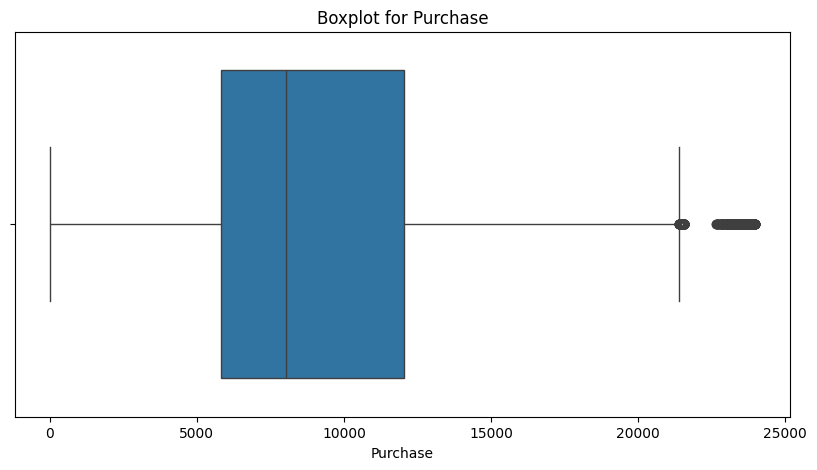

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(data = df, x = 'Purchase')
plt.title('Boxplot for Purchase')
plt.show()

*Calculating the number of Outliers*

In [ ]:
# Calculating the Quartiles
Q1 = df['Purchase'].quantile(0.25)
Q3 = df['Purchase'].quantile(0.75)

# Calculating the IQR
IQR = Q3 - Q1

# Setting lower and upper limits to seperrate the Outliers
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

# Calculating the total outliers
lower_outliers = df[df['Purchase'] < lower_limit]
upper_outliers = df[df['Purchase'] > upper_limit]
Total_Outliers = len(lower_outliers) + len(upper_outliers)
print(f'Total number of outliers in our dataset is {Total_Outliers}')

Total number of outliers in our dataset is 2677


*Removing the Outliers*

In [ ]:
remove_ouliers = df[(df['Purchase'] > lower_limit) & (df['Purchase'] < upper_limit)]

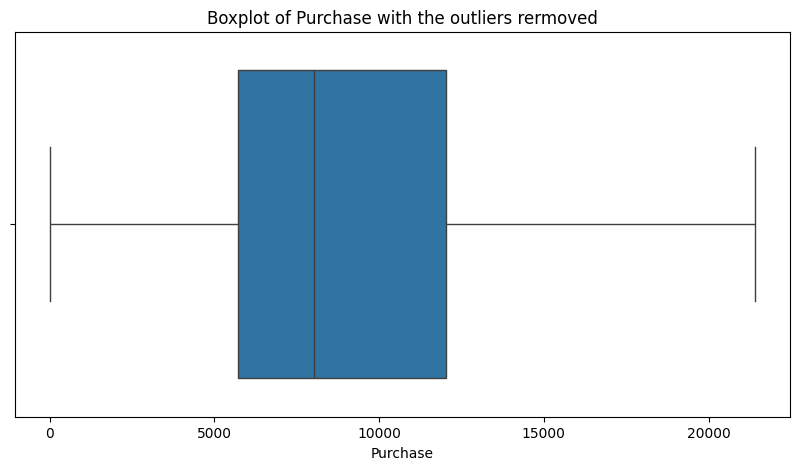

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(data = remove_ouliers, x = 'Purchase')
plt.title('Boxplot of Purchase with the outliers rermoved')
plt.show()

## 3.2Categorical Variables

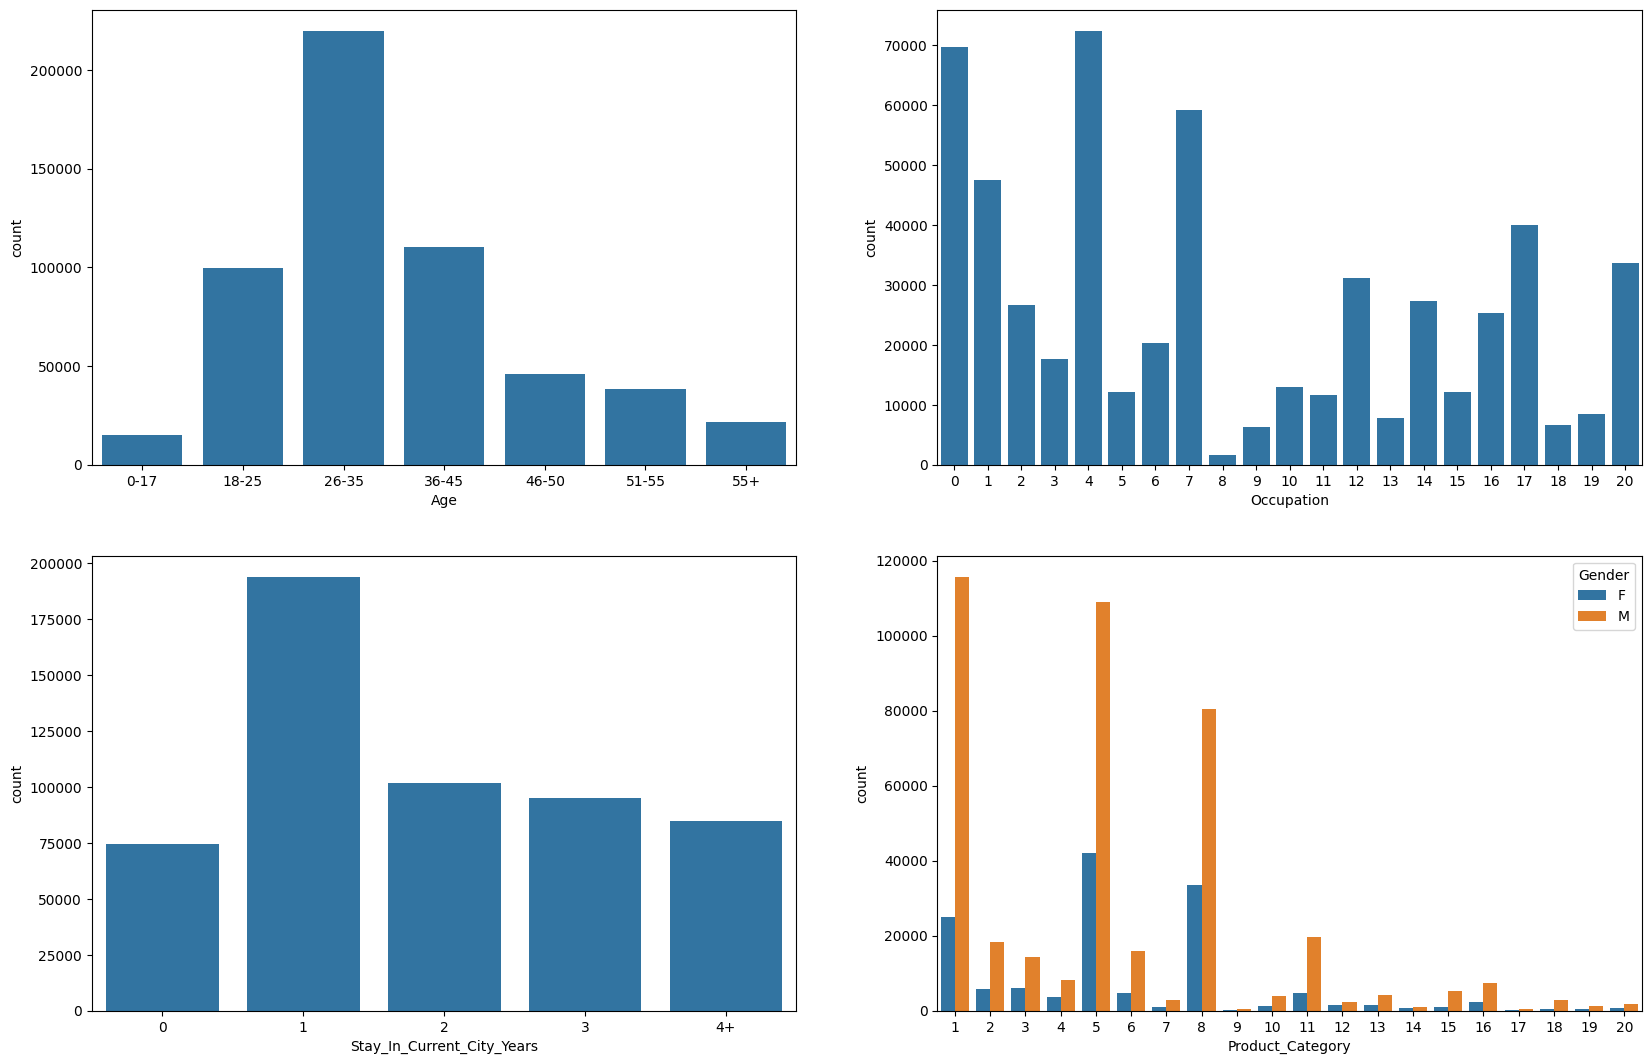

In [ ]:
fig, axs= plt.subplots(2,2 , figsize=(20,13))
sns.countplot(data=df,x='Age',ax=axs[0,0])
sns.countplot(data=df,x='Occupation',ax=axs[0,1])
sns.countplot(data=df,x='Stay_In_Current_City_Years',ax=axs[1,0])
sns.countplot(data=df,x='Product_Category',ax=axs[1,1], hue='Gender')

plt.show()

*Insights*
- Age between 26-35 were quite active and spent a significant amount during black friday sale.
- People from the occupation 0, 4 and 7 must have quite a spending power as they were the top buyers of that category.
- In the product category people prefered 1,5 and 8 more than any other product and the gender don't bear much impact since both gender have almost the same preference during the sale.
- The people who are staying in the city for a 1 year took good advantage of the black friday sale.

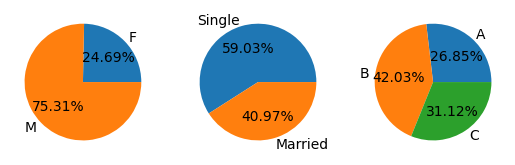

In [ ]:
# Finding Proportion of City, Gender and Marrital_status in the given data
City_prop = pd.DataFrame(df.groupby('City_Category')['User_ID'].count())
C_values = City_prop['User_ID'].tolist()
C_labels = City_prop.index

Gender_prop = pd.DataFrame(df.groupby('Gender')['User_ID'].count())
G_values = Gender_prop['User_ID'].tolist()
G_labels = Gender_prop.index

Marital_prop = pd.DataFrame(df.groupby('Marital_Status')['User_ID'].count())
M_values = Marital_prop['User_ID'].tolist()
M_labels = Marital_prop.index

plt.subplot(1,3,1)
plt.pie(G_values, labels = G_labels, autopct = '%0.2f%%')

plt.subplot(1,3,2)
plt.pie(M_values, labels = M_labels, autopct = '%0.2f%%')

plt.subplot(1,3,3)
plt.pie(C_values, labels = C_labels, autopct = '%0.2f%%')

plt.show()

*Insights*
- Most of the buyers are Men and single.
- People from the Area B are quite active during this Black Friday.

# 4.Multivariate Analysis

## 4.1 Purchase vs different aspects of customers

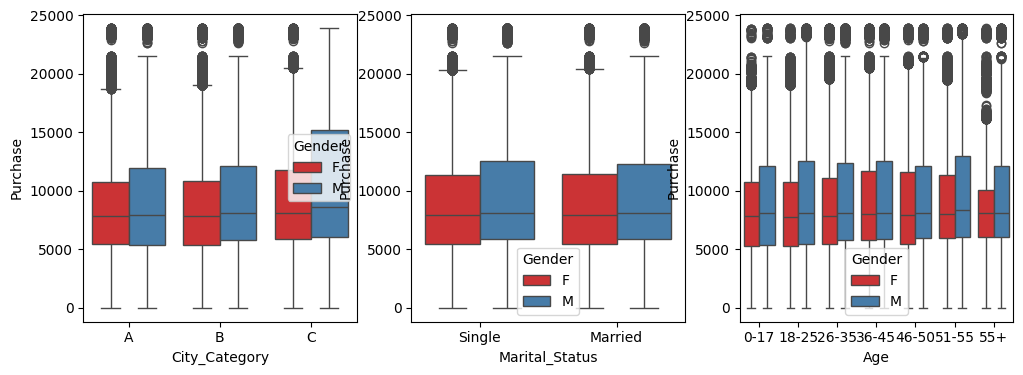

In [ ]:
fig, axis = plt.subplots(1,3, figsize=(12,4))
sns.boxplot(df, x="City_Category", y="Purchase", ax=axis[0], hue= 'Gender', palette='Set1')
sns.boxplot(df, x="Marital_Status", y="Purchase", ax=axis[1], hue= 'Gender', palette='Set1')
sns.boxplot(df, x="Age", y="Purchase", ax=axis[2], hue= 'Gender', palette='Set1')
plt.show()

# sns.boxplot(df, x="City_Category", y="Purchase", hue= 'Gender', palette='Set1')
# plt.show()

*Insights*
- From the above chart we can see that the spending habit of both Genders regardless of their age, Marital status or the city they are from, all have relatively a same spending pattern and maintains the spending average aroung 8000$.

## 4.2 Different Age groups and their buying habits

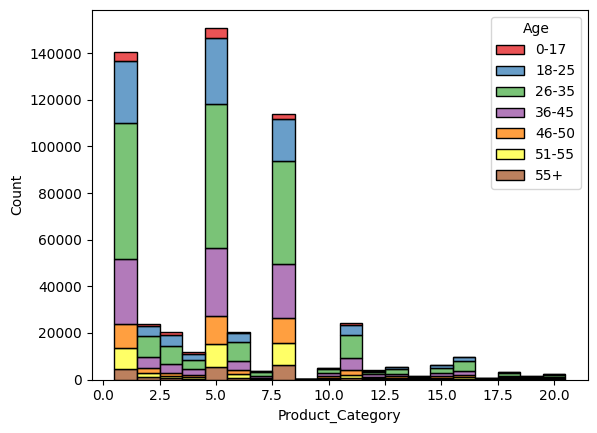

In [ ]:
sns.histplot(df, x="Product_Category", hue="Age", multiple="stack", palette='Set1')
plt.show()

## 4.3 Gender and thier Product preference

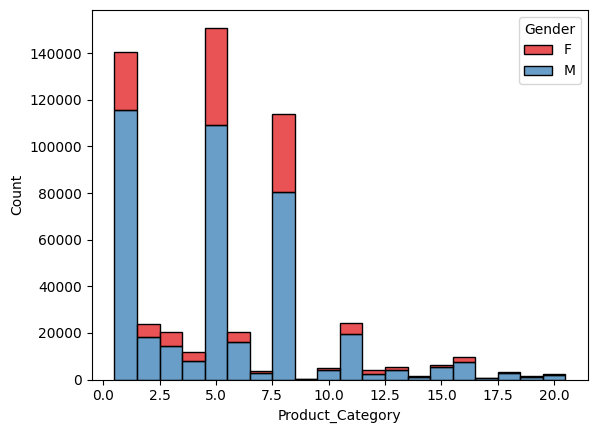

In [ ]:
sns.histplot(df, x="Product_Category", hue="Gender", multiple="stack", palette='Set1')
plt.show()

# 5.Confidence Interval

In [ ]:
def df_ci(column, confidence_level):
  male_data = df[df[column] == 'M']['Purchase']
  male_mean = male_data.mean()
  male_std = male_data.std()
  male_se = male_std/np.sqrt(len(male_data))

  male_z = norm.ppf((1 + confidence_level)/2)
  male_ci = [male_mean - (male_z * male_se), male_mean + (male_z * male_se)]
  male_range = male_ci[1] - male_ci[0]

  female_data = df[df[column] == 'F']['Purchase']
  female_mean = female_data.mean()
  female_std = female_data.std()
  female_se = female_std/np.sqrt(len(female_data))

  female_z = norm.ppf((1 + confidence_level)/2)
  female_ci = [female_mean - (female_z * female_se), female_mean + (female_z * female_se)]
  female_range = female_ci[1] - female_ci[0]

  print(f'Records of {column} column')
  print(f'Male {confidence_level*100}% condidence interval:{male_ci}')
  print(f'Male {confidence_level*100}% range:{male_range}')
  print(f'Female {confidence_level*100}% condidence interval:{female_ci}')
  print(f'Female {confidence_level*100}% range:{female_range}')
  print('\n')

In [ ]:
def sample_ci(column, confidence_level, sample_size):
  male_data = df[df[column] == 'M']['Purchase']
  sample_male = male_data.sample(sample_size, random_state = 42)
  male_mean = sample_male.mean()
  male_std = sample_male.std()
  male_se = male_std/np.sqrt(len(sample_male))

  male_z = norm.ppf((1 + confidence_level)/2)
  male_ci = [male_mean - (male_z * male_se), male_mean + (male_z * male_se)]
  male_range = male_ci[1] - male_ci[0]

  female_data = df[df[column] == 'F']['Purchase']
  sample_female = female_data.sample(sample_size, random_state = 42)
  female_mean = sample_female.mean()
  female_std = sample_female.std()
  female_se = female_std/np.sqrt(len(sample_female))

  female_z = norm.ppf((1 + confidence_level)/2)
  female_ci = [female_mean - (female_z * female_se), female_mean + (female_z * female_se)]
  female_range = female_ci[1] - female_ci[0]

  print(f'{sample_size} samples of {column} column')
  print(f'Male {confidence_level*100}% confidence interval:{male_ci}')
  print(f'Male {confidence_level*100}% range:{male_range}')
  print(f'Female {confidence_level*100}% confidence interval:{female_ci}')
  print(f'Female {confidence_level*100}% range:{female_range}')
  print('\n')

## 5.1 Finding the Confidence Interval of the Age column for the whole dataset.

### 5.1.1 Analysing Gender across different and Confidence Interval to have a conclusive understanding the Spending pattern

#### *90% Confidence Interval*

In [ ]:
df_ci('Gender', 0.90)


Records of Gender column
Male 90.0% condidence interval:[9424.512497305488, 9450.539583639042]
Male 90.0% range:26.027086333553598
Female 90.0% condidence interval:[8713.287834648021, 8755.84369566293]
Female 90.0% range:42.55586101490917




#### *95% Confidence Interval*

In [ ]:
df_ci('Gender', 0.95)


Records of Gender column
Male 95.0% condidence interval:[9422.01944736257, 9453.032633581959]
Male 95.0% range:31.013186219388444
Female 95.0% condidence interval:[8709.21154714068, 8759.919983170272]
Female 95.0% range:50.70843602959212




#### *99% Confidence Interval*

In [ ]:
df_ci('Gender', 0.99)


Records of Gender column
Male 99.0% condidence interval:[9417.146922669479, 9457.90515827505]
Male 99.0% range:40.75823560557183
Female 99.0% condidence interval:[8701.244674438389, 8767.886855872563]
Female 99.0% range:66.64218143417384




## 5.2 Finding the Confidence Interval of the Gender column across using different sample sizes.


### 5.2.1 Analysing Gender column across different sample size and Confidence Interval to have a conclusive understanding the Spending pattern.


#### **90% Confidence Interval**

*Sample Size: 300*

In [ ]:
sample_ci('Gender', 0.90, 300)

300 samples of Gender column
Male 90.0% confidence interval:[9380.83746339652, 10394.609203270147]
Male 90.0% range:1013.7717398736277
Female 90.0% confidence interval:[8398.670945742073, 9336.229054257929]
Female 90.0% range:937.5581085158556




*Sample Size: 3000*

In [ ]:
sample_ci('Gender', 0.90, 3000)

3000 samples of Gender column
Male 90.0% confidence interval:[9489.930814851989, 9801.341185148012]
Male 90.0% range:311.41037029602376
Female 90.0% confidence interval:[8658.782721289897, 8954.244612043434]
Female 90.0% range:295.46189075353686




*Sample Size: 30000*

In [ ]:
sample_ci('Gender', 0.90, 30000)

30000 samples of Gender column
Male 90.0% confidence interval:[9438.269538879862, 9535.561994453472]
Male 90.0% range:97.29245557360991
Female 90.0% confidence interval:[8610.964490517577, 8700.998442815755]
Female 90.0% range:90.03395229817761




#### **95% Confidence Interval**

*Sample Size: 300*

In [ ]:
sample_ci('Gender', 0.95, 300)

300 samples of Gender column
Male 95.0% confidence interval:[9283.731565877591, 10491.715100789075]
Male 95.0% range:1207.9835349114837
Female 95.0% confidence interval:[8308.865304074718, 9426.034695925284]
Female 95.0% range:1117.1693918505662




*Sample Size: 3000*

In [ ]:
sample_ci('Gender', 0.95, 3000)

3000 samples of Gender column
Male 95.0% confidence interval:[9460.10182838994, 9831.170171610062]
Male 95.0% range:371.0683432201222
Female 95.0% confidence interval:[8630.48138780842, 8982.545945524911]
Female 95.0% range:352.0645577164905




*Sample Size: 30000*

In [ ]:
sample_ci('Gender', 0.95, 30000)

30000 samples of Gender column
Male 95.0% confidence interval:[9428.950211018666, 9544.881322314668]
Male 95.0% range:115.9311112960022
Female 95.0% confidence interval:[8602.340431075772, 8709.62250225756]
Female 95.0% range:107.28207118178761




#### **99% Confidence Interval**

*Sample Size: 300*

In [ ]:
sample_ci('Gender', 0.99, 300)

300 samples of Gender column
Male 99.0% confidence interval:[9093.943597589929, 10681.503069076738]
Male 99.0% range:1587.5594714868093
Female 99.0% confidence interval:[8133.345271735851, 9601.55472826415]
Female 99.0% range:1468.2094565282978




*Sample Size: 3000*

In [ ]:
sample_ci('Gender', 0.99, 3000)

3000 samples of Gender column
Male 99.0% confidence interval:[9401.80276642402, 9889.469233575981]
Male 99.0% range:487.6664671519611
Female 99.0% confidence interval:[8575.168036935633, 9037.859296397699]
Female 99.0% range:462.6912594620662




*Sample Size: 30000*

In [ ]:
sample_ci('Gender', 0.99, 30000)

30000 samples of Gender column
Male 99.0% confidence interval:[9410.736113360614, 9563.09541997272]
Male 99.0% range:152.3593066121066
Female 99.0% confidence interval:[8585.485196103737, 8726.477737229596]
Female 99.0% range:140.99254112585913




*Insights*
- The analysis emphasizes the significance of sample size in determining population parameters. It indicates that larger sample sizes lead to narrower and more precise confidence intervals. In a business context, this means that bigger sample sizes can yield more dependable insights and estimates.
- There are overlaps found in the confidence intervals.